**Group Notebook**

The metric we have chosen for this project is the healthiest neighborhood in Pittsburgh in order to decide who will be recruited to a utopian society on Neptune. In order to do this, we have decided to focus on the physical activity of individuals in neighborhoods in Pittsburgh. We will be looking at playgrounds, courts and rinks, and the amount of stairs per neighborhood.

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

**Imaan:** Playgrounds

The metric I am focusing on is playgrounds per neighborhood. I will be measuring the amount of playgrounds per neighborhood as well as the amount of children enrolled in schools (grades k-5) per neighborhood. In theory, the more playgrounds per neighborhood, the more children will be outside engaging in physcial activity, and the more times children are engaging in physical activity, the more healthier they will be. Ideally, the smaller the population to playground ratio, the healthier the neighborhood because it would be less likely for the playgrounds to become too overcrowded. Therefore, the best neighborhood will be the one with a small population and high amount of playgrounds. The dataset I will be using for this then will be playgrounds per neighborhood and school enrollemt per neighborhood.

Text(0, 0.5, 'Number of Playgrounds')

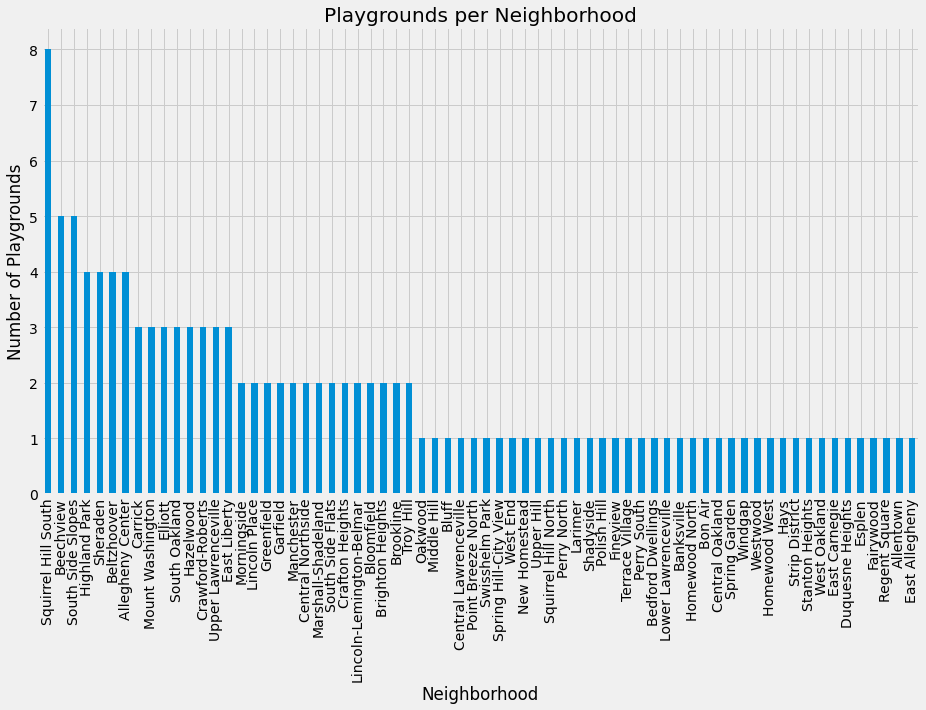

In [2]:
pg=pd.read_csv("playgrounds.tsv", sep='\t')
pg['neighborhood'].value_counts().plot( kind='bar', figsize=(14,8) )
plt.title("Playgrounds per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Playgrounds")

Text(0, 0.5, 'Grade School Population')

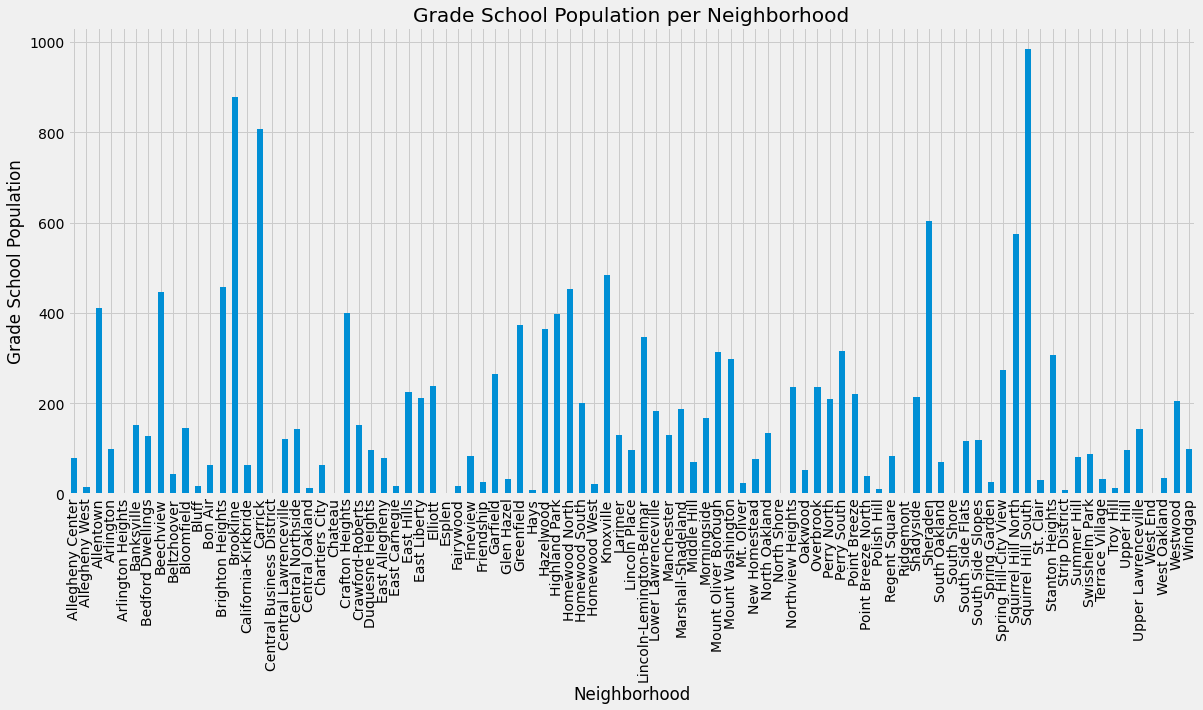

In [4]:
se=pd.read_csv("school_enrollment.csv")
gs = se.loc[:,["Neighborhood","Estimate; Enrolled in school: - Enrolled in kindergarten","Estimate; Enrolled in school: - Enrolled in grade 1","Estimate; Enrolled in school: - Enrolled in grade 2","Estimate; Enrolled in school: - Enrolled in grade 3","Estimate; Enrolled in school: - Enrolled in grade 4","Estimate; Enrolled in school: - Enrolled in grade 5"]]
g = gs.groupby("Neighborhood").sum()
g['total'] = g['Estimate; Enrolled in school: - Enrolled in kindergarten'] + g['Estimate; Enrolled in school: - Enrolled in grade 1'] + g['Estimate; Enrolled in school: - Enrolled in grade 2'] + g['Estimate; Enrolled in school: - Enrolled in grade 3'] + g['Estimate; Enrolled in school: - Enrolled in grade 4'] + g['Estimate; Enrolled in school: - Enrolled in grade 5']
k = g.groupby("Neighborhood").sum()['total']
k.plot(kind='bar', figsize=(18,8))
plt.title("Grade School Population per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Grade School Population")

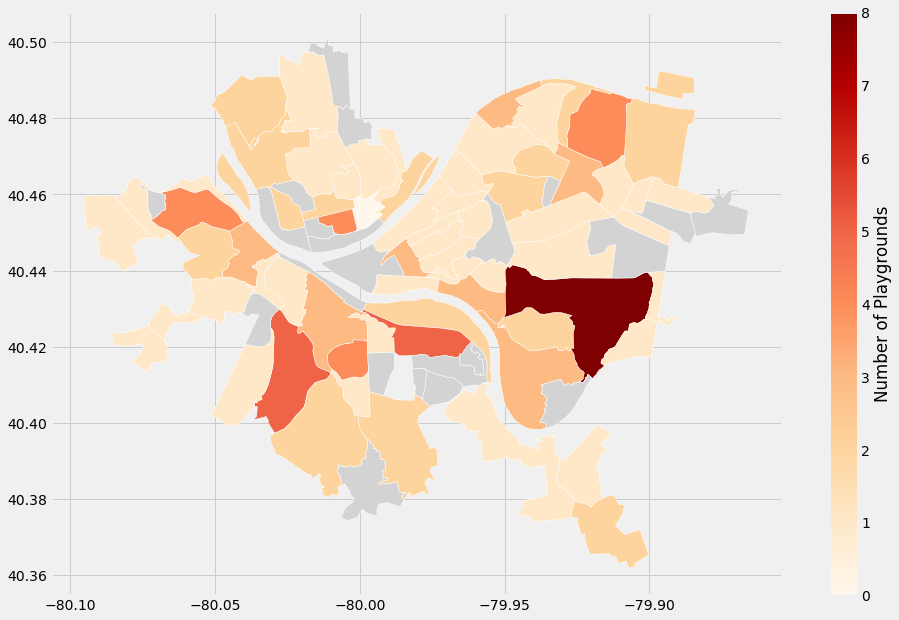

In [5]:
p=pg.groupby("neighborhood").count()
play = p.groupby("neighborhood").sum()['park']
play.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
pg_map = neighborhoods.merge(play, how='left', left_on='hood', right_on='neighborhood')
pg_map.plot(column='park', 
               cmap='OrRd',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Number of Playgrounds"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

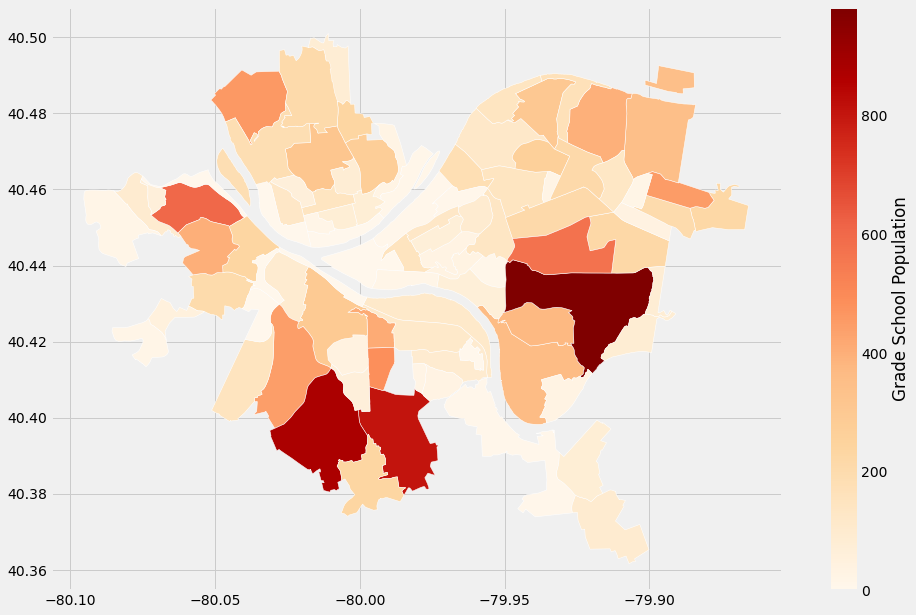

In [6]:
gs_map = neighborhoods.merge(k, how='left', left_on='hood', right_on='Neighborhood')
gs_map.plot(column='total',
              cmap='OrRd',              
              edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Grade School Population"}, 
                figsize=(15, 10),         
           )

For this analysis, I will take the top 3 neighborhoods in terms of amount of playgrounds and compare it to their student population. I am only taking the top 3 because there still needs to be a high enough amount of playgrounds to qualify as the "best neighborhood due to amount of playgrounds", so I will only be taking the neighborhoods that have 5 or more playgrounds. I will take the population and divide it by the amount of playgrounds per neighborhood (as this would be the amount of children per playground if every child was at a playground per neighborhood). The neighborhood with the smallest number will therefore have the best ratio of children to playground and be the winner of this metric.

**Squirrel Hill South:**
   - Playgrounds: 8
   - Population: 983
   - Score: 122.875
   - Rank: 3

**Beechview:**
   - Playgrounds: 5
   - Population: 446
   - Score: 89.2
   - Rank: 2

**South Side Slopes:**
   - Playgrounds: 5
   - Population: 118 
   - Score: 23.6
   - Rank: 1

So, by this analysis, I can conclude that the neighborhood with the smallest child population to playground ratio is South Side Slopes. Thus, by the metric described earlier, this would be the healthiest neighborhood by this dataset. The neighborhood in second place would be Beechview and and third place Squirrel Hill South.

**Jeremy:** Courts and Rinks

The following analysis of dataset "courts_and_rinks" will determine which neighborhood has the most of those type of facility. Access to facilites is essential to promiting an overall healty lifestyle.

Text(0, 0.5, 'Number of Courts and Rinks')

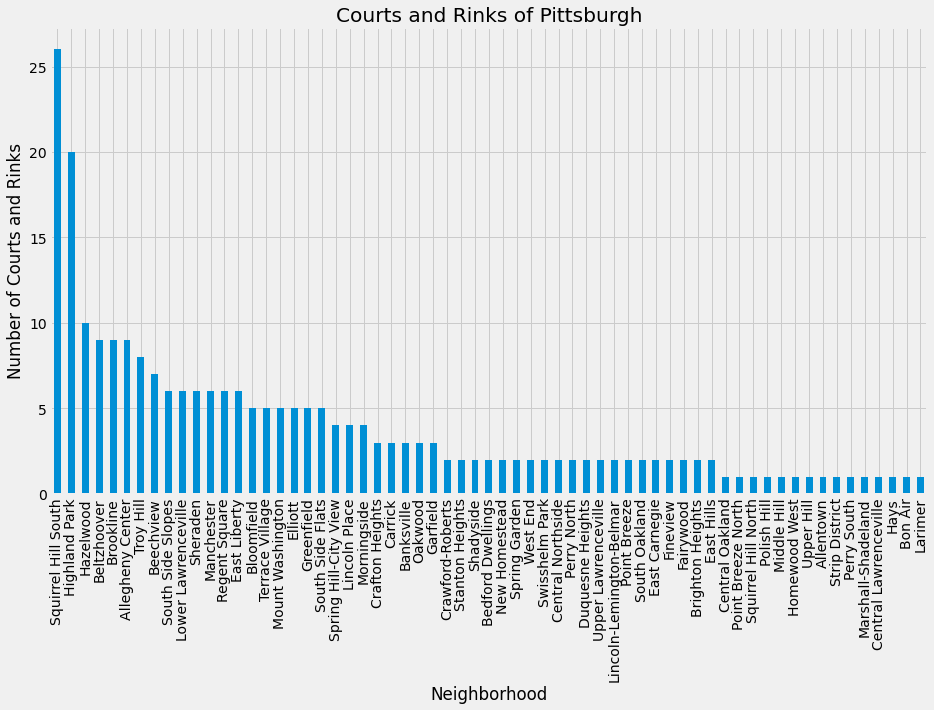

In [6]:
df = pd.read_csv("courts_and_rinks.csv")
df['neighborhood'].value_counts().plot( kind='bar', figsize=(14,8) )
plt.title("Courts and Rinks of Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Courts and Rinks")

- Squirrel Hill South is a clear winner with 26 different court or rink facilities.
- The folowing code will merge the data set with a map of Pittsburgh's neighborhoods. And the heatmap will indicate which neighborhood is Squirll Hill.

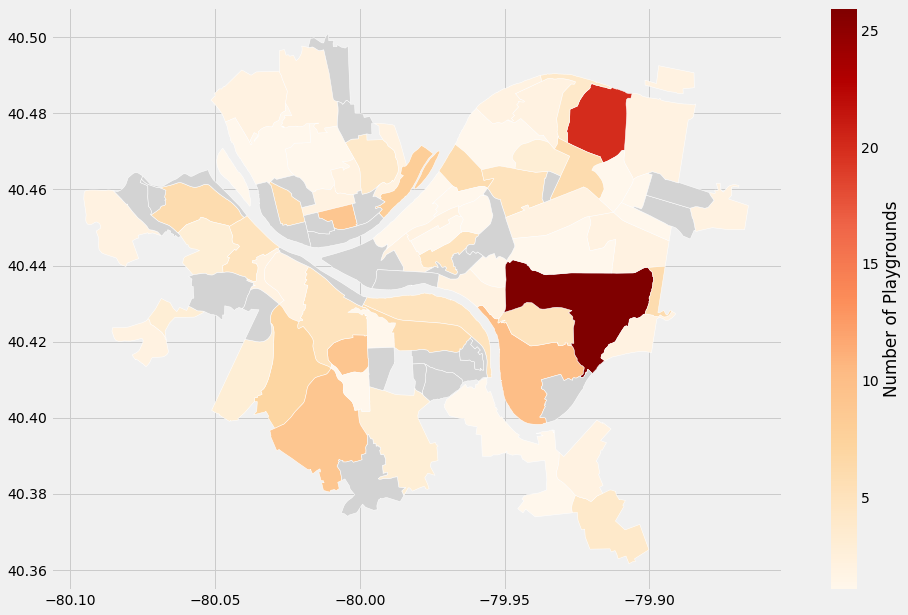

In [8]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
pr_counts1 = df.groupby("neighborhood").count()
pr_counts2 = pr_counts1.groupby("neighborhood").sum()
parks_map = neighborhoods.merge(pr_counts2, how='left', left_on='hood', right_on='neighborhood')
parks_map.plot(column='park', 
               cmap='OrRd',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Number of Playgrounds"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

So far, it seems like the group's winner for Best Neighborhood in the City of Pittsburgh is Squirrel Hill. Whether you are in the north or the south you will have easy access to health promoting facilities. The younger generations will have numerous playgrounds, and the teenager and up will have ample opportunities to get real good at tennis, basketball or ice skating in Pittsburgh's long winters.

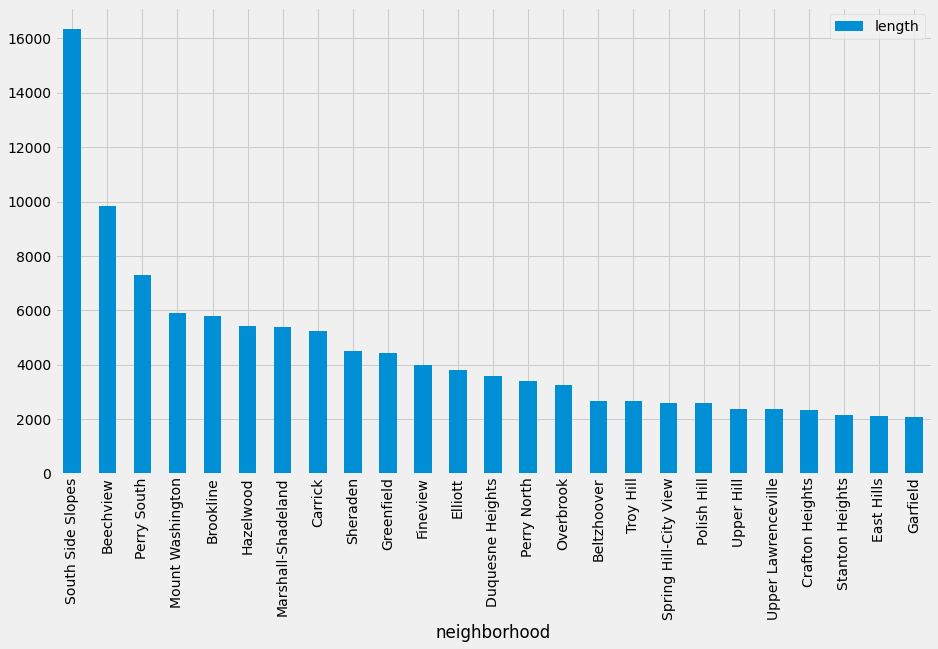

In [9]:
stairs = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64")
stairs_by_length = stairs.loc[:,["neighborhood", "length"]].groupby("neighborhood").sum()
top_five = stairs_by_length.sort_values(by = "length", ascending = False)[0:25]
top_five.plot(kind = "bar", figsize=(14,8))

## Group Analysis

For the group analysis, we will be assigning point values to each of our top three neighborhoods for each dataset. Each of our first place neighborhoods will recieve 100 points, second place will recieve 50 points, and third place will recieve 25 points. The neighborhoos with the highest total points will be the groups healthiest neighborhood.

Imaan's top 3: South Side Slopes, Beechview, Squirrel Hill South

Jeremy's top 3: Squirrel Hill South, Highland Park, Hazelwood

Sodi's top 3: South Side Slopes, Beechview, Perry South

**Imaan**
- South Side Slopes: 100
- Beechview: 50
- Squirrel Hill South: 25

**Jeremy**
- Squirrel Hill South: 100
- Highland Park: 50
- Hazelwood: 25

**Sodi**
- South Side Slopes: 100
- Squirrel Hill South: 50
- Beechview: 25

**Totals**

**Group Winner**
Unfortunately, it looks like Squirrel Hill, while substantially ahead in terms of the amount of fitness centers, is relatively lacking in terms of natural slopes, and hence stairs. Thus, we might be led to believe that while it may offer the most opportunites, only those who take advantage of those opportunities will be physically fit. Thus, our random selection might select a member there who doesn't take advantage of all the rinks and courts, and even who didn't use the playgrounds as a child, and thus our immensely important mission will fail.
Conversely, a citizen of a neighborhood that has a lot of grade (and thus a lot of stairs), will be forced to participate in thier use, and that might even make them more inclined to take advantage of the other resources! Coincidentally, Beechwood seems to rank fairly highly on everyone's list, meaning it may have the best balance of these features, and thus be home to the next citizens of Neptune!!!


Introduction: Introduce the project, your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.
The Metric: Describe your metric, what features are you measuring. What datasets are you using?
The Best Neighborhood: Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.
Conclusion: Reflect on how the data driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.